### Лабораторная работа №2. Методы классификации данных.

Выполнил: Кучумов Михаил 18-ИВТ-3  
Вариант №28.

### Задание:
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

1.  Id number: Идентификационный номер
2.  RI: Индекс преломления
3.  Na: Натрий
4.  Mg: Магний
5.  Al: Аллюминий
6.  Si: Кремний
7.  K:  Калий
8.  Ca: Кальций
9.  Ba: Барий
10. Fe: Железо
11. Type of glass: Тип стекла
    - 1 Окна для сооружений, обработанные
    - 2 Окна для сооружений, не обработанные
    - 3 Окна для автомобилей, обработанные
    - 4 Окна для автомобилей, не обработанные
    - 5 Для контейнеров
    - 6 Для посуды
    - 7 Для фар

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [1]:
import pandas as pd

df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
print("Размер набора данных до удаления дубликатов:\t", df.index.size)
df.drop_duplicates(keep = 'first', inplace = True)
print("Размер набора данных после удаления дубликатов:\t", df.index.size)

Размер набора данных до удаления дубликатов:	 214
Размер набора данных после удаления дубликатов:	 213


## 3. Оцените сбалансированность данных по классам (постройте гистограмму).

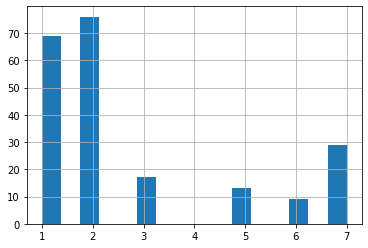

In [3]:
df.Type.hist(bins = 16)

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [4]:
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
df1 = df.drop('Type', axis = 1)

BoxPlot для признаков до масштабирования:

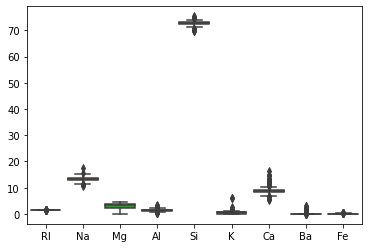

In [5]:
sn.boxplot(data = df1)

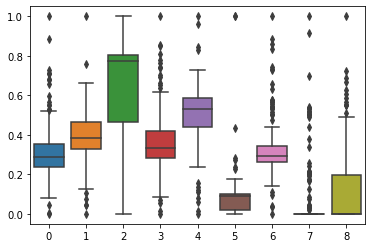

In [6]:
scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

sn.boxplot(data = df1)

## 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [7]:
dummie_df = pd.get_dummies(df.Type, prefix = "Type")
df = df.drop('Type', axis = 1)
df = df.merge(dummie_df, left_index=True, right_index=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0,0,0,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0,0,0,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0,0,0,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0,0,0,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0,0,0,0,0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0,0,0,0,0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0,0,0,0,0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0,0,0,0,0,1


## 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [8]:
corr_df = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

In [9]:
corr_df = corr_df.corr()
corr_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


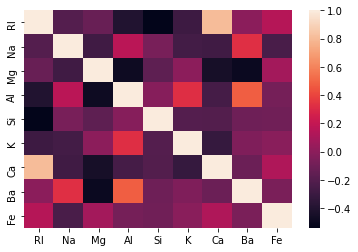

In [10]:
sn.heatmap(corr_df)

## 7. Заполните пропущенные значения в данных;

In [11]:
df.count()

RI        213
Na        213
Mg        213
Al        213
Si        213
K         213
Ca        213
Ba        213
Fe        213
Type_1    213
Type_2    213
Type_3    213
Type_5    213
Type_6    213
Type_7    213
dtype: int64

Пропусков значений нет

 ## 8. Решите поставленную задачу классификации в соответствии с заданием.

### Линейный классификатор (персептрон)

In [12]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc

X = df.drop(('Type_6'), axis=1)
y = df['Type_6']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

In [13]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, '\nalpha:', alpha, '\nmax_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 0.9597701149425287 
alpha: 0.05263157894736842 
max_iter: 1
Accuracy ppn: 0.95312


e:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
e:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Логический классификатор (бинарное решающее дерево).

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print(' best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
accuracy_score  = np.mean(y_test == dtc.predict(X_test))
print(' Accuracy dtc: %.5f' % accuracy_score)

 best: 0.9866666666666667 
 at features number: 2 
 at depth: 8
 Accuracy dtc: 0.98438


## 9. Сравните кривые для классификаторов.

### PR кривые

In [15]:
from sklearn.calibration import CalibratedClassifierCV

test_y_inversion = [1-y for y in y_test]

prob_dtc = dtc.predict_proba(X_test)

cppn = CalibratedClassifierCV(ppn, cv=2)
cppn.fit(X_train, y_train)
prob_ppn = cppn.predict_proba(X_test)

e:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
e:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [16]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

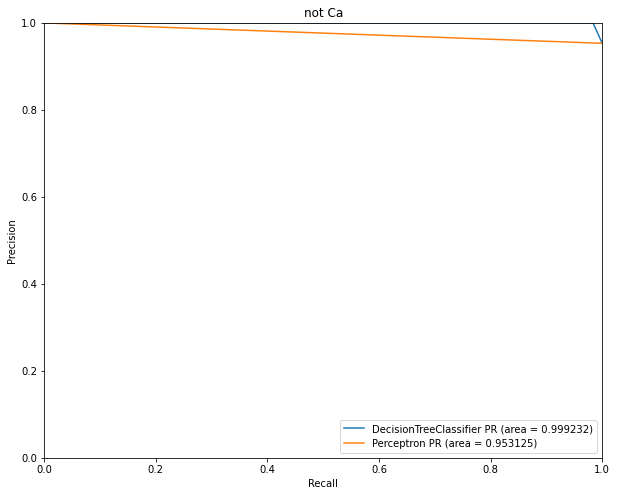

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

addPlotPr(prob_dtc, 0, 'DecisionTreeClassifier', test_y_inversion)
addPlotPr(prob_ppn, 0, 'Perceptron', test_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('not Ca')
plt.legend(loc=4, fontsize='medium')
plt.show()

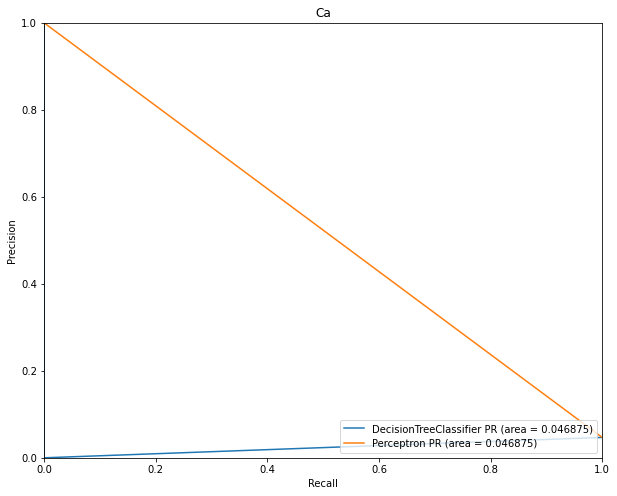

In [18]:
plt.figure(figsize=(10,8))

addPlotPr(prob_dtc, 0, 'DecisionTreeClassifier', y_test)
addPlotPr(prob_ppn, 1, 'Perceptron', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Ca')
plt.legend(loc=4, fontsize='medium')
plt.show()

### ROC кривые

In [19]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

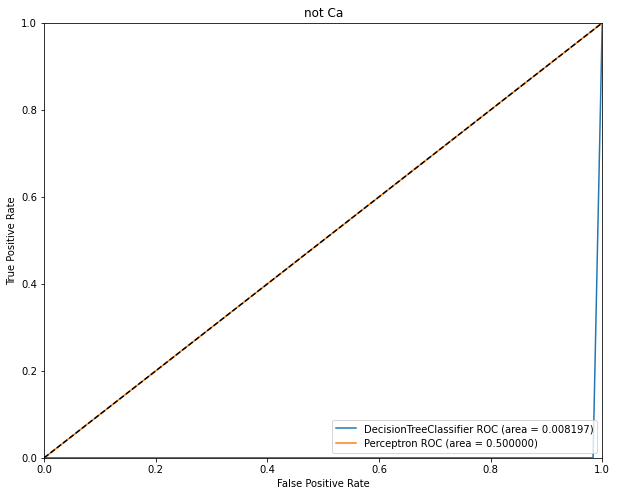

In [22]:
plt.figure(figsize=(10,8))

addPlotRoc0(prob_dtc, 'DecisionTreeClassifier', test_y_inversion)
addPlotRoc0(prob_ppn, 'Perceptron', test_y_inversion)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()

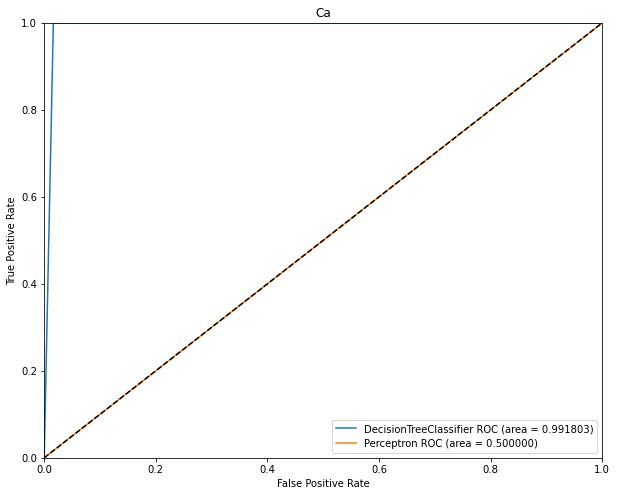

In [23]:
plt.figure(figsize=(10,8))

addPlotRoc1(prob_dtc, 'DecisionTreeClassifier', y_test)
addPlotRoc1(prob_ppn, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()